In [ ]:
import cartopy
import matplotlib.pyplot as plt
import cartopy.mpl.gridliner as gridliner
import matplotlib.ticker as mticker
import cartopy.mpl.ticker as cartopyticker
import numpy as np
lon_formatter = cartopyticker.LongitudeFormatter()
lat_formatter = cartopyticker.LatitudeFormatter()
plt.rcParams.update({'font.size': 12})

In [54]:
coordinates = (-19.001, -11.49, 26.99, 30.001)
myproj = cartopy.crs.Mercator(central_longitude=0.5 * (coordinates[0] + coordinates[1]), 
                              min_latitude=coordinates[2], max_latitude=coordinates[3], 
                              globe=None, latitude_true_scale=None)
data_crs = ccrs.PlateCarree()

In [63]:
textprops = dict(facecolor='white', alpha=0.05, edgecolor='white')
plotkwargs = dict(transform=data_crs, ha="center", fontsize=14, bbox=textprops, zorder=7)

/home/ctroupin/Software/PythonEnvs/EMODnetPlot/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ctroupin/Software/PythonEnvs/EMODnetPlot/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


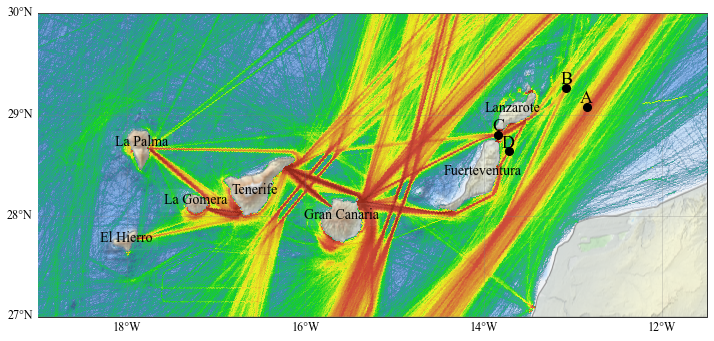

In [86]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection=myproj)

# Release positions
ax.plot(-12.8442, 29.0813, "ko", ms=8, zorder=8, transform=data_crs)
ax.text(-12.8442, 29.0813, "A", fontsize=18, transform=data_crs, ha="center", va="bottom", zorder=8)
ax.plot(-13.0722, 29.2632, "ko", ms=8, zorder=8, transform=data_crs)
ax.text(-13.0722, 29.2632, "B", fontsize=18, transform=data_crs, ha="center", va="bottom", zorder=8)
ax.plot(-13.8402, 28.8031, "ko", ms=8, zorder=8, transform=data_crs)
ax.text(-13.8402, 28.8031, "C", fontsize=18, transform=data_crs, ha="center", va="bottom", zorder=8)
ax.plot(-13.7202, 28.6398, "ko", ms=8, zorder=8, transform=data_crs)
ax.text(-13.7202, 28.6398, "D", fontsize=18, transform=data_crs, ha="center", va="bottom", zorder=8)

# Island names
ax.text(-15.5917, 27.975, "Gran Canaria", **plotkwargs)
ax.text(-16.573, 28.222, "Tenerife", **plotkwargs)
ax.text(-17.8391, 28.6906, "La Palma", **plotkwargs)
ax.text(-18.0093, 27.7364, "El Hierro", **plotkwargs)
ax.text(-17.2252, 28.1168, "La Gomera", **plotkwargs)
ax.text(-14.013, 28.411, "Fuerteventura", **plotkwargs)
ax.text(-13.672, 29.027, "Lanzarote", **plotkwargs)

# Traffic density map (2020)
ax.add_wms(wms='https://ows.emodnet-humanactivities.eu/wms',
           layers=['2020_yearly_rd_All'], alpha=.85, zorder=4)
           

# EMODnet bathymetry
ax.add_wms(wms='http://ows.emodnet-bathymetry.eu/wms',
               layers=['emodnet:mean_atlas_land', 'coastlines'],
               transform=myproj, zorder=3)

# Grid lines and labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.5, color='gray', alpha=0.5, linestyle='-', zorder=6)

gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator(np.arange(-20., -10., 2.))
gl.ylocator = mticker.FixedLocator(np.arange(26., 31., 1.))

# Domain extension
ax.set_extent(coordinates)

plt.savefig("../figures/canary_map01.png", dpi=300, bbox_inches="tight")
plt.show()

## Archipielago Chinijo

In [73]:
coordinates_zoom = (-14.65, -11.99, 27.99, 29.501)
myproj2 = cartopy.crs.Mercator(central_longitude=0.5 * (coordinates[0] + coordinates[1]), 
                              min_latitude=coordinates[2], max_latitude=coordinates[3], 
                              globe=None, latitude_true_scale=None)

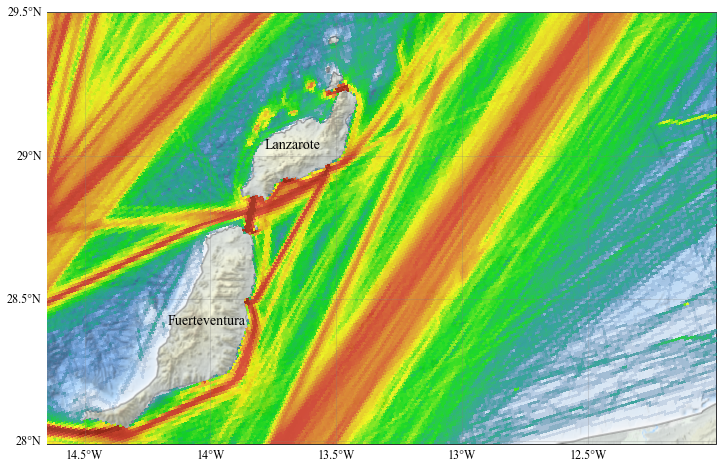

In [77]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection=myproj2)

ax.text(-14.013, 28.411, "Fuerteventura", **plotkwargs)
ax.text(-13.672, 29.027, "Lanzarote", **plotkwargs)

ax.add_wms(wms='https://ows.emodnet-humanactivities.eu/wms',
           layers=['2020_yearly_rd_All'], alpha=.85, zorder=4)
           

ax.add_wms(wms='http://ows.emodnet-bathymetry.eu/wms',
               layers=['emodnet:mean_atlas_land', 'coastlines'],
               transform=myproj, zorder=3)


gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.5, color='gray', alpha=0.5, linestyle='-', zorder=6)

gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator(np.arange(-20., -12., 0.5))
gl.ylocator = mticker.FixedLocator(np.arange(26., 31., 0.5))

ax.set_extent(coordinates_zoom)
# ax.coastlines()
#plt.savefig("/home/ctroupin/Projects/ctroupin.github.io/figures/blog/cartopy-wms/cartopywms01.jpg",
#           bbox_inches="tight")
plt.show()